# "Deep Learning for Text Classification Using Embedding Layers in Feed Forward Networks"

## Keras Embedding Layer

The Keras Embedding Layer serves to convert positive **integers (indexes)** into ***dense vectors of a fixed size***.

**Key Parameters**:
- ***input_dim***: An integer representing the **size of the vocabulary**, specifically the maximum integer index + 1.
- ***output_dim***: An integer indicating the **dimensionality** of the dense embedding.
- ***input_length***: The **length of input** sequences, essential when it remains constant. This argument is necessary if you intend to connect Flatten and Dense layers upstream, as it enables the computation of the shape of the dense outputs.

**Input Shape**: A 2D tensor with shape: (batch_size, input_length).

**Output Shape**: A 3D tensor with shape: (batch_size, input_length, output_dim).

For additional details, please refer to the [Keras official website](https://keras.io/api/layers/core_layers/embedding/).

## A simple model with an embedding layer

In [ ]:
class FFNModel:
    def __init__(self, max_len, vocab_size, embed_dim=16, feed_forward_dim=64, number_of_sentiment=3):
        self.max_len = max_len
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.feed_forward_dim = feed_forward_dim
        self.number_of_sentiment = number_of_sentiment

    def build_model(self):
        inputs_tokens = layers.Input(shape=(self.max_len,), dtype=tf.int32)
        embedding_layer = layers.Embedding(input_dim=self.vocab_size,
                                           output_dim=self.embed_dim,
                                           input_length=self.max_len)
        x = embedding_layer(inputs_tokens)
        x = layers.Flatten()(x)
        dense_layer = layers.Dense(self.feed_forward_dim, activation='relu')
        x = dense_layer(x)
        x = layers.Dropout(.5)(x)
        outputs = layers.Dense(self.number_of_sentiment)(x)

        model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_FFN')
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        metric_fn = tf.keras.metrics.SparseCategoricalAccuracy()
        model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)

        return model

model_builder = FFNModel(max_len, vocab_size)
model_FFN = model_builder.build_model()

time: 138 ms (started: 2024-05-02 07:49:45 +00:00)


In [ ]:
model_FFN.summary()

Model: "model_FFN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 60)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 60, 16)            179520    
                                                                 
 flatten_3 (Flatten)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                61504     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 241219 (942.26 KB)
Trainable params: 241219

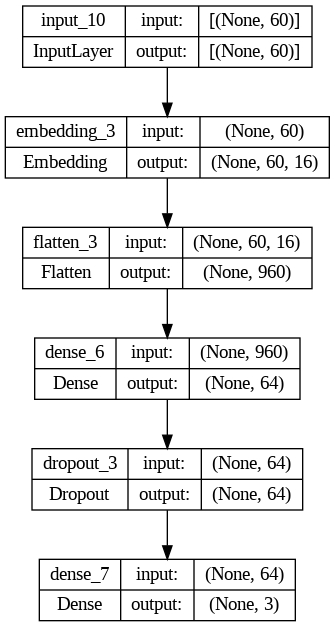

time: 87 ms (started: 2024-05-02 07:49:49 +00:00)


In [ ]:
tf.keras.utils.plot_model(model_FFN,show_shapes=True)

## Train

In [ ]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 3.25 ms (started: 2024-05-02 07:49:52 +00:00)


In [ ]:
history = model_FFN.fit(train_ds, validation_data=val_ds, verbose=2, epochs=7)

Epoch 1/7
1609/1609 - 35s - loss: 0.0526 - sparse_categorical_accuracy: 0.9863 - val_loss: 2.4661e-05 - val_sparse_categorical_accuracy: 1.0000 - 35s/epoch - 22ms/step
Epoch 2/7
1609/1609 - 14s - loss: 1.7203e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.5179e-05 - val_sparse_categorical_accuracy: 1.0000 - 14s/epoch - 8ms/step
Epoch 3/7
1609/1609 - 16s - loss: 5.6670e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6301e-05 - val_sparse_categorical_accuracy: 1.0000 - 16s/epoch - 10ms/step
Epoch 4/7
1609/1609 - 14s - loss: 2.6114e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.7273e-06 - val_sparse_categorical_accuracy: 1.0000 - 14s/epoch - 8ms/step
Epoch 5/7
1609/1609 - 14s - loss: 2.5493e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.4005e-06 - val_sparse_categorical_accuracy: 1.0000 - 14s/epoch - 9ms/step
Epoch 6/7
1609/1609 - 14s - loss: 6.2484e-06 - sparse_categorical_accuracy: 1.0000 - val_loss: 6.7351e-07 - val_sparse_categorical_accuracy: 1.0000

Let's observe the **accuracy** and the **loss** values during the training at each epoch:

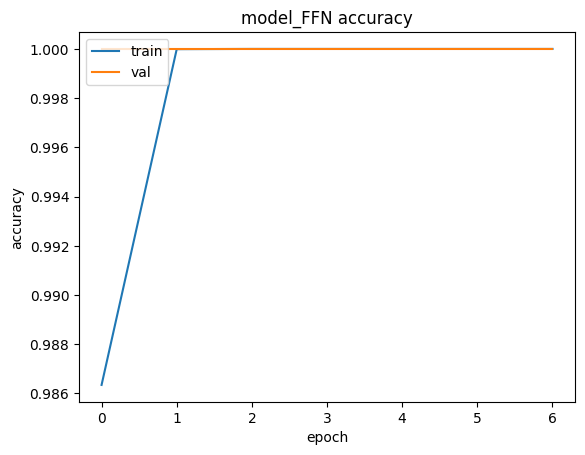

time: 309 ms (started: 2024-05-02 07:52:41 +00:00)


In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_FFN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

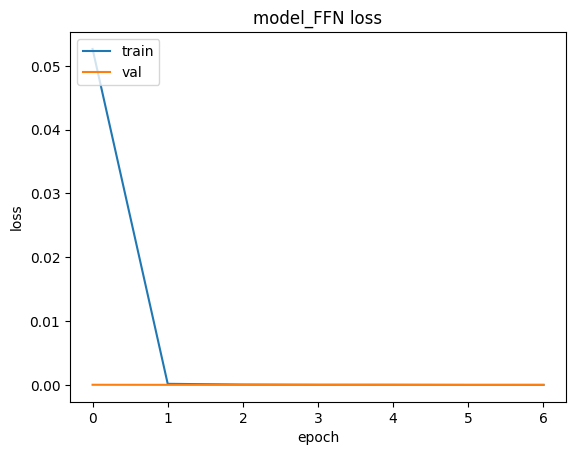

time: 281 ms (started: 2024-05-02 07:52:53 +00:00)


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_FFN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Save the trained model

In [ ]:
tf.keras.models.save_model(model_FFN, 'MultiClassTextClassification_FFN')

time: 961 ms (started: 2024-05-02 07:52:59 +00:00)


## Test

We can test the trained model with the test dataset:

In [ ]:
loss, accuracy = model_FFN.evaluate(test_ds)
print("Test accuracy: ", accuracy)

470/470 [==============================] - 7s 6ms/step - loss: 3.1446e-04 - sparse_categorical_accuracy: 1.0000
Test accuracy:  0.9999667406082153
time: 7.23 s (started: 2024-05-02 07:53:04 +00:00)


## Predictions

We can use the **trained model** `predict()` method to **predict** the class of the given reviews as follows:

In [ ]:
preds = model_FFN.predict(test_ds)
preds = preds.argmax(axis=1)

470/470 [==============================] - 1s 3ms/step
time: 1.56 s (started: 2024-05-02 07:53:20 +00:00)


We can also get the **actual (true)** class of the given reviews as follows:

In [ ]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

time: 6.68 s (started: 2024-05-02 07:53:27 +00:00)


By comparing the ***`preds`*** and the ***`actuals`*** values, we can **measure** the model performance as below.

## Classification Report

Since we are dealing with a **classification**, it is a good idea to generate a **classification report** to observe the performance of the model for ***each class***. We can use the [SKLearn `classification_report()` method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to build a text report showing the main classification **metrics**.

Report is the summary of the **precision, recall, F1** score for ***each class***.

The reported ***averages*** include:
* **macro average** (averaging the unweighted mean per label),
* **weighted average** (averaging the support-weighted mean per label),  
* **sample average** (only for multilabel classification),
* **micro average** (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

In [ ]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999      9248
           1     1.0000    0.9999    0.9999      9544
           2     1.0000    1.0000    1.0000     11288

    accuracy                         1.0000     30080
   macro avg     1.0000    1.0000    1.0000     30080
weighted avg     1.0000    1.0000    1.0000     30080

time: 83.4 ms (started: 2024-05-02 07:53:38 +00:00)


## Confusion Matrix

**Confusion Matrix** is used to know the performance of a Machine learning model at classification. The results are presented in a ***matrix*** form. Confusion Matrix gives a comparison between **Actual** and **Predicted** values. The numbers on the **diagonal** are the number of the **correct predictions**.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_sentiment.values() ,columns = id_to_sentiment.values())

time: 150 ms (started: 2024-05-02 07:54:02 +00:00)


Below, you can observe the distribution of predictions over the classes.

In [ ]:
cm_df

,positive,neutral,negative
positive,9248,0,0
neutral,1,9543,0
negative,0,0,11288


time: 35.8 ms (started: 2024-05-02 07:55:57 +00:00)


In [ ]:
%%capture
!pip install ipywidgets

time: 10.4 s (started: 2024-05-02 07:56:06 +00:00)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.update_heatmap(vmin, vmax)>

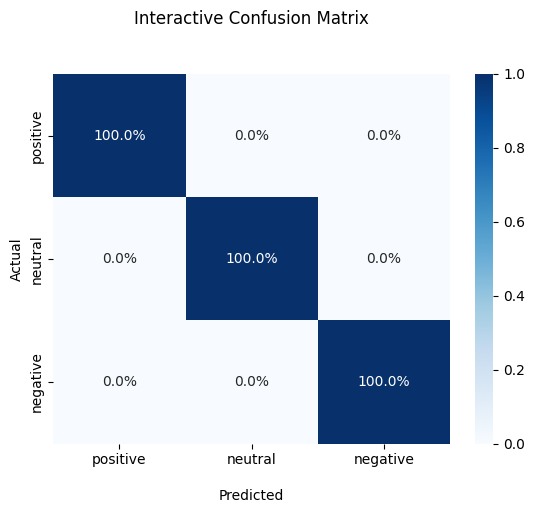

time: 664 ms (started: 2024-05-02 07:56:17 +00:00)


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

def update_heatmap(vmin, vmax):
    ax = sns.heatmap(cm_df / np.sum(cm_df), vmin=vmin, vmax=vmax, annot=True, fmt='.1%', cmap='Blues')
    ax.set_title('Interactive Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_ticklabels(id_to_sentiment.values())
    ax.yaxis.set_ticklabels(id_to_sentiment.values())

interact(update_heatmap, vmin=fixed(0), vmax=fixed(1))

We are still working of finding why we got these results. We will redo the task using the dataset given to us and see if we have the same results.